In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Quantos pedidos - únicos - a loja Super Baratão teve no mês de Dezembro?
2. Qual foi o mês com maior percentual de rejeição da loja Mercado Marisol?
3. Quantos usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro?
4. Construa um gráfico (e compartilhe comigo!) com o total de pedidos de 2022 e 2023. O gráfico deve exibir o total de tarefas de cada loja individualmente.
5. Identifique o % de variação de pedidos - únicos - por loja no período ano contra ano.

Atenção, sabemos que o período é curto, por isso vamos combinar as regras do jogo.
- Faça o melhor que puder com o tempo que tiver.
- Utilize Google Planilhas para fazer o exercício.
- Caso você tenha dúvidas sobre algum item, responda o melhor que puder com a informação que tiver.
Muito boa sorte com o exercício! Nos falamos na sequência!

In [2]:
data = pd.read_csv('data.csv'
                 , sep=';'
                 , index_col=0
                 # ,error_bad_lines=False
                 ,encoding='latin-1')

In [3]:
# Convertendo a coluna Date Date para o formato correto
data['Date Date'] = pd.to_datetime(data['Date Date'], infer_datetime_format=True)

In [4]:
# Criando novas colunas para o mês, dia e ano
data["mes"] = data["Date Date"].dt.month
data["dia"] = data["Date Date"].dt.day
data["ano"] = data["Date Date"].dt.year

In [5]:
data.describe()

,User Phone Number,Brand ID,Order Number,Submission Amount,Quantity SKU,mes,dia,ano
count,1.193500e+04,11935.0,1.193400e+04,11935.000000,11934.000000,11935.000000,11935.000000,11935.000000
mean,5.571844e+12,706.0,1.128378e+06,4.353833,23.410089,6.855300,14.950649,2022.463678
std,3.465065e+09,0.0,4.944199e+05,0.227427,21.768725,5.001316,9.222207,0.498700
min,5.511934e+12,706.0,1.090000e+02,4.000000,1.000000,1.000000,1.000000,2022.000000
25%,5.571983e+12,706.0,1.106580e+06,4.000000,8.000000,2.000000,7.000000,2022.000000
50%,5.571987e+12,706.0,1.112984e+06,4.500000,18.000000,11.000000,14.000000,2022.000000
75%,5.571989e+12,706.0,1.119290e+06,4.500000,33.000000,12.000000,23.000000,2023.000000
max,5.579997e+12,706.0,1.134328e+07,4.500000,868.000000,12.000000,31.000000,2023.000000


In [6]:
# Funcao para analise inicial dos dados
def overview(df):
    import missingno as msno
    
    # Head df
    print('\n','='*100, '\n', 'head')
    display(df.head(3))
    
    # Tail df
    print('\n','='*100, '\n', 'tail')
    display(df.tail(3))
    
    # Shape 
    print('\n','='*100, '\n')
    print(f'shape: {df.shape}')
    
    # Colunas numéricas e categóricas
    print('\n','='*100, '\n')
    """ retorna (colunas numericas, colunas categoricas)"""
    print(f'colunas: {df.columns} \n')
    cols = df.columns # Todas as colunas
    num_cols = df._get_numeric_data().columns # Colunas numéricas
    cat_cols =  (set(cols) - set(num_cols)) # Colunas categóricas
    print(f'num_cols (total de {len(num_cols)}): {num_cols}\n')
    print(f'cat_cols (total de {len(cat_cols)}): {cat_cols} - total: {len(cat_cols)}')
      
    # Estatisticas   
    print('\n','='*100, '\n', 'Estatísticas')
    display(df.describe())
    
    print('\n','='*100, '\n', 'df.info()')
    display(df.info())
    
    # Dados Faltantes
    df = df.replace('', np.NaN)
    miss_cols = df.isnull().sum()[df.isnull().sum() != 0]
    print(f'\nQtd. cols com NaNs: {len(miss_cols)}\n')
    print(miss_cols.sort_values(ascending=False))
    msno.matrix(df)


 head


,Date Date,User Phone Number,Brand ID,Brand Name,Store Name,Order Number,Orden revisada (Yes / No),Orden aprobada (Yes / No),Submission Amount,Quantity SKU,Quantity Itens,mes,dia,ano
1,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125756.0,Yes,Yes,4.5,66.0,120,2,28,2023
2,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125785.0,Yes,Yes,4.5,35.0,71,2,28,2023
3,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125789.0,Yes,Yes,4.5,33.0,124,2,28,2023



 tail


,Date Date,User Phone Number,Brand ID,Brand Name,Store Name,Order Number,Orden revisada (Yes / No),Orden aprobada (Yes / No),Submission Amount,Quantity SKU,Quantity Itens,mes,dia,ano
11933,2022-11-01,5579996887969,706,Atacado e Varejo Separador,Mercado Marisol,1100275.0,Yes,Yes,4.0,46.0,68,11,1,2022
11934,2022-11-01,5579996887969,706,Atacado e Varejo Separador,Mercado Marisol,1101126.0,Yes,Yes,4.0,1.0,10,11,1,2022
11935,2022-11-01,5579996887969,706,Atacado e Varejo Separador,Mercado Marisol,1101193.0,Yes,Yes,4.0,19.0,38,11,1,2022




shape: (11935, 14)


colunas: Index(['Date Date', 'User Phone Number', 'Brand ID', 'Brand Name',
       'Store Name', 'Order Number', 'Orden revisada (Yes / No)',
       'Orden aprobada (Yes / No)', 'Submission Amount', 'Quantity SKU',
       'Quantity Itens', 'mes', 'dia', 'ano'],
      dtype='object') 

num_cols (total de 8): Index(['User Phone Number', 'Brand ID', 'Order Number', 'Submission Amount',
       'Quantity SKU', 'mes', 'dia', 'ano'],
      dtype='object')

cat_cols (total de 6): {'Store Name', 'Orden revisada (Yes / No)', 'Date Date', 'Orden aprobada (Yes / No)', 'Brand Name', 'Quantity Itens'} - total: 6

 Estatísticas


,User Phone Number,Brand ID,Order Number,Submission Amount,Quantity SKU,mes,dia,ano
count,1.193500e+04,11935.0,1.193400e+04,11935.000000,11934.000000,11935.000000,11935.000000,11935.000000
mean,5.571844e+12,706.0,1.128378e+06,4.353833,23.410089,6.855300,14.950649,2022.463678
std,3.465065e+09,0.0,4.944199e+05,0.227427,21.768725,5.001316,9.222207,0.498700
min,5.511934e+12,706.0,1.090000e+02,4.000000,1.000000,1.000000,1.000000,2022.000000
25%,5.571983e+12,706.0,1.106580e+06,4.000000,8.000000,2.000000,7.000000,2022.000000
50%,5.571987e+12,706.0,1.112984e+06,4.500000,18.000000,11.000000,14.000000,2022.000000
75%,5.571989e+12,706.0,1.119290e+06,4.500000,33.000000,12.000000,23.000000,2023.000000
max,5.579997e+12,706.0,1.134328e+07,4.500000,868.000000,12.000000,31.000000,2023.000000



 df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11935 entries, 1 to 11935
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Date                  11935 non-null  datetime64[ns]
 1   User Phone Number          11935 non-null  int64         
 2   Brand ID                   11935 non-null  int64         
 3   Brand Name                 11935 non-null  object        
 4   Store Name                 11935 non-null  object        
 5   Order Number               11934 non-null  float64       
 6   Orden revisada (Yes / No)  11935 non-null  object        
 7   Orden aprobada (Yes / No)  11935 non-null  object        
 8   Submission Amount          11935 non-null  float64       
 9   Quantity SKU               11934 non-null  float64       
 10  Quantity Itens             11934 non-null  object        
 11  mes                        11935 non-null  int64       

None


Qtd. cols com NaNs: 3

Order Number      1
Quantity SKU      1
Quantity Itens    1
dtype: int64


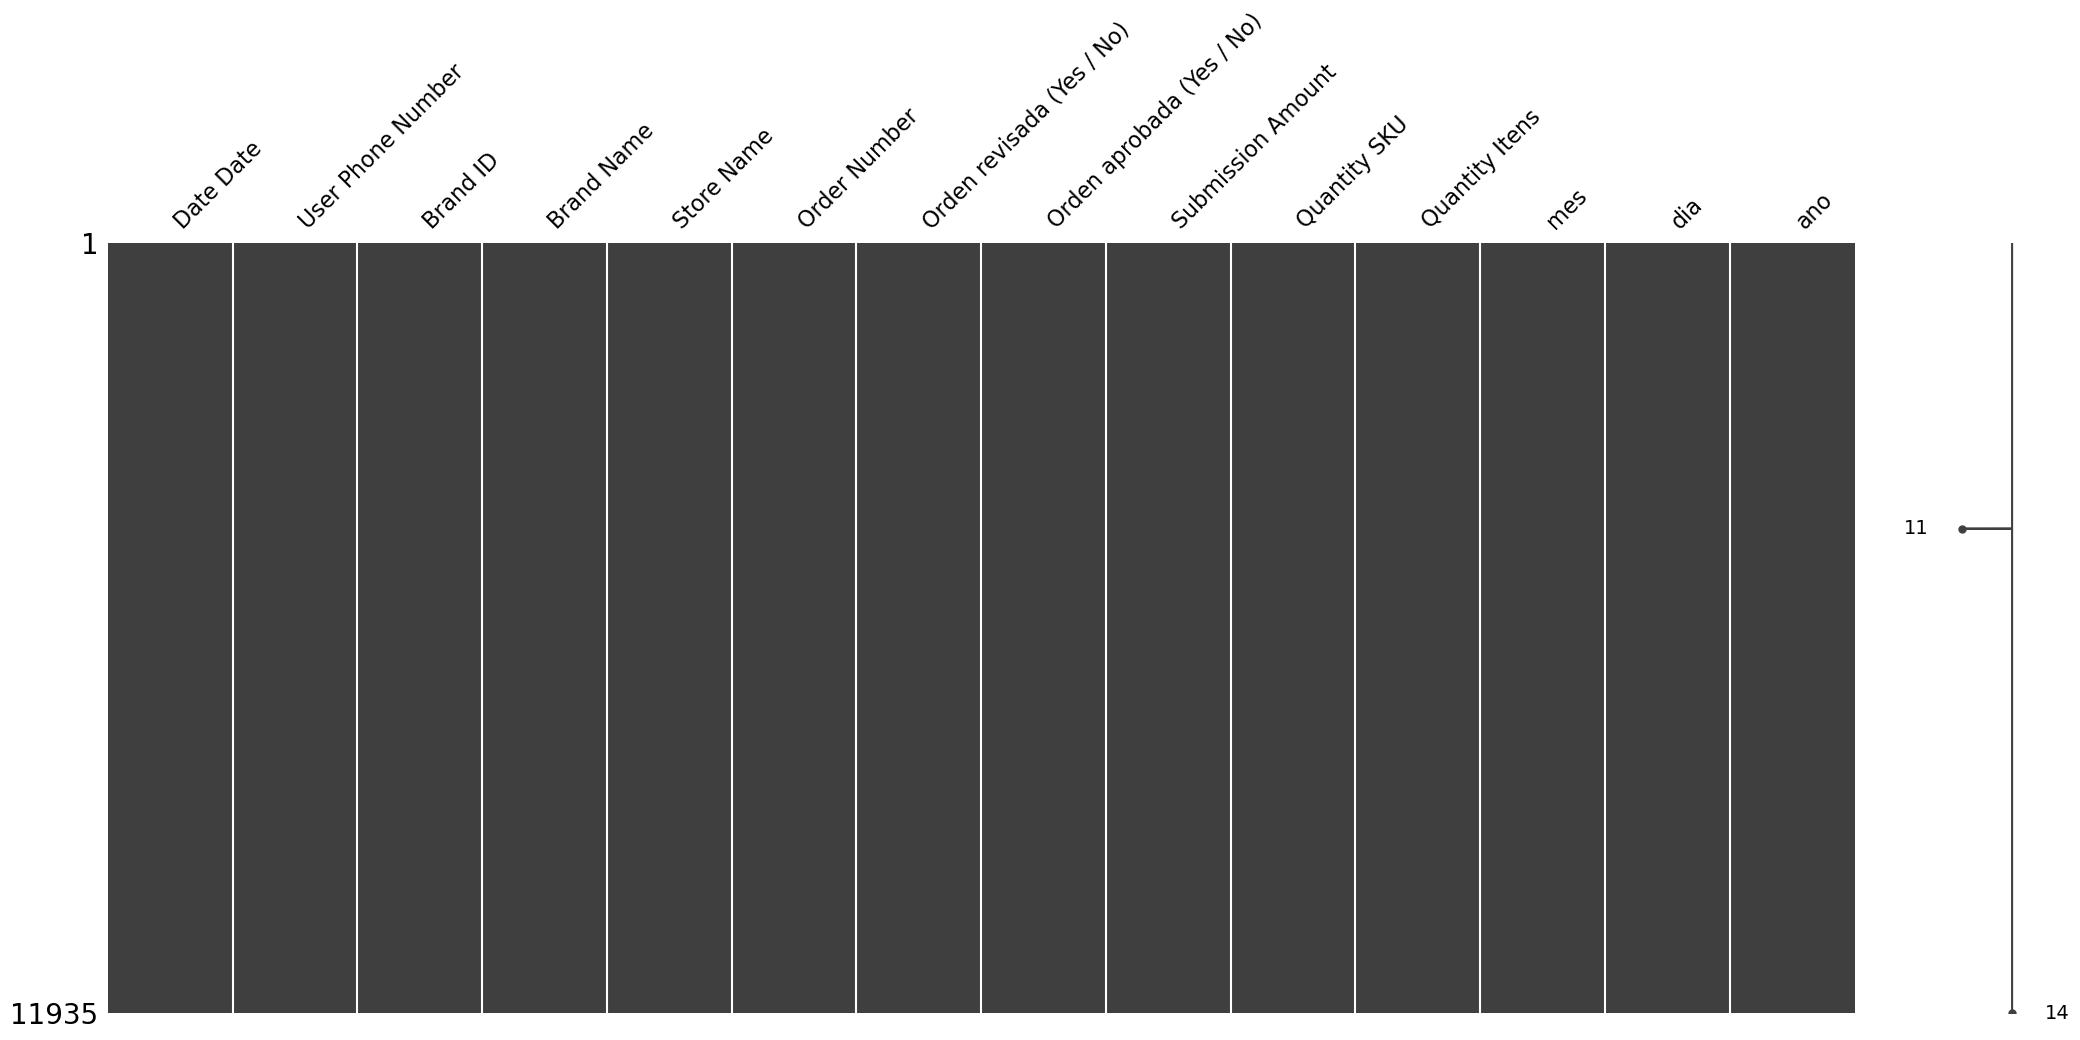

In [7]:
overview(data)

In [8]:
# Transformando a coluna data para datetime
data['Date Date'] = pd.to_datetime(data['Date Date'], infer_datetime_format=True)

In [9]:
# Dados duplicados
data.duplicated().sum()

287

In [10]:
# Deletando dados duplicados
data = data.drop_duplicates()
data.duplicated().sum()

0

# 1. Quantos pedidos - únicos - a loja Super Baratão teve no mês de Dezembro?

In [11]:
# filtrar os dados para manter somente os pedidos em fevereiro na loja "Super Baratão"
feb_orders = data[(data['mes'] == 12) & (data['Store Name'] == 'Super Baratão')]
feb_orders.head(2)

,Date Date,User Phone Number,Brand ID,Brand Name,Store Name,Order Number,Orden revisada (Yes / No),Orden aprobada (Yes / No),Submission Amount,Quantity SKU,Quantity Itens,mes,dia,ano
5535,2022-12-31,5547991501262,706,Atacado e Varejo Separador,Super Baratão,1113805.0,Yes,Yes,4.5,48.0,123,12,31,2022
5536,2022-12-31,5547991501262,706,Atacado e Varejo Separador,Super Baratão,1113816.0,Yes,No,4.5,62.0,128,12,31,2022


In [12]:
# contar quantos pedidos únicos existem
unique_orders = feb_orders['Order Number'].nunique()

print(f"A loja Super Baratão teve {unique_orders} pedidos únicos em fevereiro.")

A loja Super Baratão teve 1448 pedidos únicos em fevereiro.


# 2. Qual foi o mês com maior percentual de rejeição da loja Mercado Marisol?

In [13]:
# Selecionando os dados do Mercado Marisol
mari_data = data[data['Store Name'] == 'Mercado Marisol']
mari_data.head(2)

,Date Date,User Phone Number,Brand ID,Brand Name,Store Name,Order Number,Orden revisada (Yes / No),Orden aprobada (Yes / No),Submission Amount,Quantity SKU,Quantity Itens,mes,dia,ano
103,2023-02-28,5571987430998,706,Atacado e Varejo Separador,Mercado Marisol,1124477.0,Yes,Yes,4.5,10.0,23,2,28,2023
104,2023-02-28,5571987430998,706,Atacado e Varejo Separador,Mercado Marisol,1125483.0,Yes,Yes,4.5,27.0,115,2,28,2023


In [14]:
# Encontrando o total de ordens agrupadas por mes
tot = mari_data[['mes', 'Orden aprobada (Yes / No)']].groupby(by='mes').count()
tot = tot.squeeze() # Pandas to series

tot

mes
1     523
2     595
11    602
12    568
Name: Orden aprobada (Yes / No), dtype: int64

In [15]:
# Filtrando apenas as ordens aprovadas e agrupadas por mes
aprov = mari_data[mari_data['Orden aprobada (Yes / No)'] == 'Yes'].groupby('mes').count()['Orden aprobada (Yes / No)']
aprov

mes
1     509
2     578
11    551
12    563
Name: Orden aprobada (Yes / No), dtype: int64

In [16]:
# Encontrando o percentual de ordens aprovadas
top_aprob = (aprov / tot).sort_values(ascending=False).head(1)
top_aprob

mes
12    0.991197
Name: Orden aprobada (Yes / No), dtype: float64

In [17]:
print(f"O mes com maior percentual de aprovacao foi o {top_aprob.index[0]} com {round(top_aprob.values[0] * 100, 2)} %.")

O mes com maior percentual de aprovacao foi o 12 com 99.12 %.


# 3. Quantos usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro?

In [18]:
# Selecionando os dados do Mercado Preço Baixo no mes de Dezembrop (12)
pb_data = data[(data['mes'] == 12) & (data['Store Name'] == 'Mercado Preço Baixo')]
pb_data.head(2)

,Date Date,User Phone Number,Brand ID,Brand Name,Store Name,Order Number,Orden revisada (Yes / No),Orden aprobada (Yes / No),Submission Amount,Quantity SKU,Quantity Itens,mes,dia,ano
5560,2022-12-31,5571982653062,706,Atacado e Varejo Separador,Mercado Preço Baixo,1113964.0,Yes,No,4.5,14.0,20,12,31,2022
5561,2022-12-31,5571982653062,706,Atacado e Varejo Separador,Mercado Preço Baixo,1113972.0,Yes,No,4.5,2.0,2,12,31,2022


In [19]:
# Utilizando o numero de telefone para identificar cada usuario
dez_users = pb_data['User Phone Number'].nunique()
dez_users

12

In [20]:
print(f"O total de usuários que fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro foi de {dez_users}")

O total de usuários que fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro foi de 12


# 4. Construa um gráfico (e compartilhe comigo!) com o total de pedidos de 2022 e 2023. O gráfico deve exibir o total de tarefas de cada loja individualmente.

In [21]:
tot_orders = data.groupby(by=['Store Name', 'ano']).count()['Order Number'].reset_index()
tot_orders

,Store Name,ano,Order Number
0,Mercado Marisol,2022,1170
1,Mercado Marisol,2023,1118
2,Mercado Preço Baixo,2022,1988
3,Mercado Preço Baixo,2023,1677
4,Super Baratão,2022,3015
5,Super Baratão,2023,2679


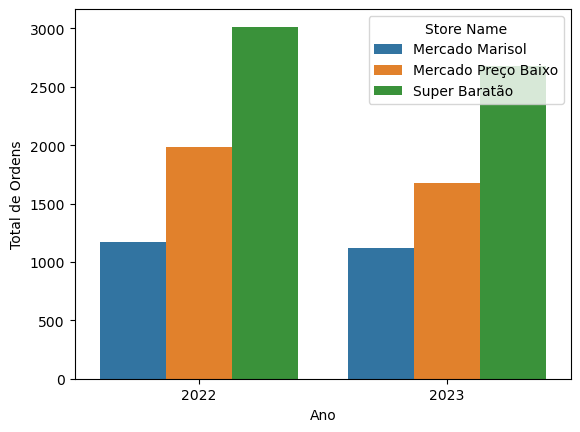

In [22]:
sns.barplot(x = 'ano', y='Order Number', hue='Store Name', data = tot_orders)
plt.ylabel('Total de Ordens')
plt.xlabel('Ano')
plt.show()

# 5. Identifique o % de variação de pedidos - únicos - por loja no período ano contra ano.

In [23]:
len(data) # Quantidade de pedidos

11648

In [24]:
# Quantidade de pedidos unicos - usando como referencia o numero da ordem do pedido
mod_data = data.drop_duplicates(subset=['Order Number'])
len(mod_data)

10887

In [25]:
mod_data2 = mod_data.groupby(by=['Store Name', 'ano'])['Order Number'].count().reset_index()
mod_data2

,Store Name,ano,Order Number
0,Mercado Marisol,2022,1093
1,Mercado Marisol,2023,1089
2,Mercado Preço Baixo,2022,1721
3,Mercado Preço Baixo,2023,1552
4,Super Baratão,2022,2894
5,Super Baratão,2023,2537


In [26]:
mod_data2['% var'] = mod_data2.groupby(by=['Store Name'])['Order Number'].pct_change() * 100
mod_data2

,Store Name,ano,Order Number,% var
0,Mercado Marisol,2022,1093,NaN
1,Mercado Marisol,2023,1089,-0.365965
2,Mercado Preço Baixo,2022,1721,NaN
3,Mercado Preço Baixo,2023,1552,-9.819872
4,Super Baratão,2022,2894,NaN
5,Super Baratão,2023,2537,-12.335867
